### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-10-28,457191,4981549,743721,607068,287631,140628,132004,230786,118561,95522,87322,127195,125875,4849,200179
2021-10-29,457740,4989532,745377,607462,287951,140815,132037,231931,118590,95701,87368,127225,125998,4849,200197
2021-10-30,458186,4995464,745668,607694,288276,140981,132074,233063,118612,95734,87368,127258,126126,4849,200217
2021-10-31,458437,4999871,745832,607824,288365,141055,132100,234194,118625,95735,87368,127281,126303,4849,200246
2021-11-01,458880,5006081,747033,607922,288365,141098,132120,235318,118632,95838,87368,127311,126456,4849,200276


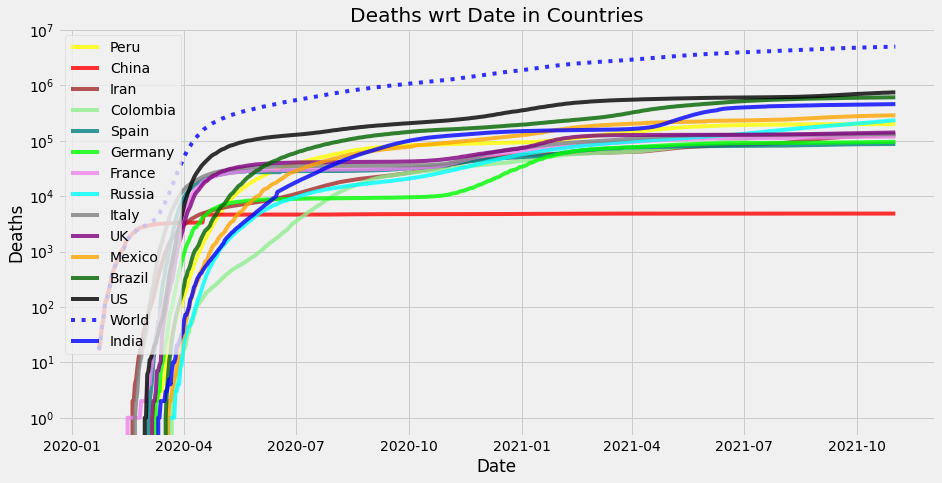

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-10-28,14348,458372,78128,15268,9300,39478,4863,39070,6105,8079,2212,1750,11409,66,998
2021-10-29,14313,507058,97361,11965,4001,43258,5332,38805,6494,37520,2261,1604,9893,83,840
2021-10-30,12830,381541,29302,10693,3478,41009,4877,39203,7399,17248,0,1629,6809,75,1032
2021-10-31,12514,305970,17599,6761,1446,37732,4525,39931,6349,-554,0,1710,8427,92,888
2021-11-01,10423,426987,121139,3838,0,39999,2818,39321,1883,11315,0,1590,9857,72,393


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-10-28,17981,437131,87011,13840,5238,40901,3429,31132,5744,12451,2201,1480,11926,40,840
2021-10-29,17737,441793,87701,13715,5156,41058,3556,31644,5794,14122,2205,1488,11791,43,840
2021-10-30,17409,437776,83808,13513,5044,41055,3644,32148,5901,14330,2058,1497,11459,45,853
2021-10-31,17083,428989,79394,13063,4804,40833,3703,32667,5931,13338,1920,1512,11257,48,855
2021-11-01,16639,428855,82177,12448,4484,40777,3644,33110,5661,13203,1792,1517,11163,49,824


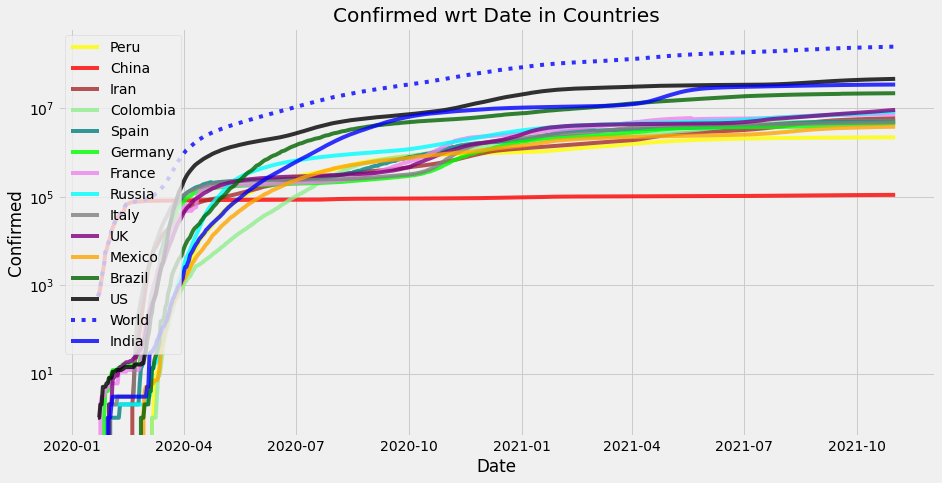

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-10-28,805,8514,1776,389,743,166,50,1114,31,33,33,36,159,0,30
2021-10-29,549,7983,1656,394,320,187,33,1145,29,179,46,30,123,0,18
2021-10-30,446,5932,291,232,325,166,37,1132,22,33,0,33,128,0,20
2021-10-31,251,4407,164,130,89,74,26,1131,13,1,0,23,177,0,29
2021-11-01,443,6210,1201,98,0,43,20,1124,7,103,0,30,153,0,30


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-10-28,455.76,7380.31,1612.44,358.37,332.29,147.06,40.85,1028.74,35.14,75.17,32.82,32.09,176.47,0.0,29.61
2021-10-29,467.41,7455.65,1617.88,362.82,330.75,152.05,39.87,1043.27,34.37,88.15,34.47,31.83,169.78,0.0,28.16
2021-10-30,464.74,7265.19,1452.02,346.47,330.03,153.80,39.51,1054.37,32.83,81.26,30.16,31.97,164.56,0.0,27.14
2021-10-31,438.02,6907.92,1291.02,319.41,299.90,143.82,37.82,1063.94,30.35,71.22,26.39,30.85,166.12,0.0,27.37
2021-11-01,438.64,6820.68,1279.77,291.74,262.42,131.22,35.60,1071.45,27.43,75.20,23.09,30.75,164.48,0.0,27.70


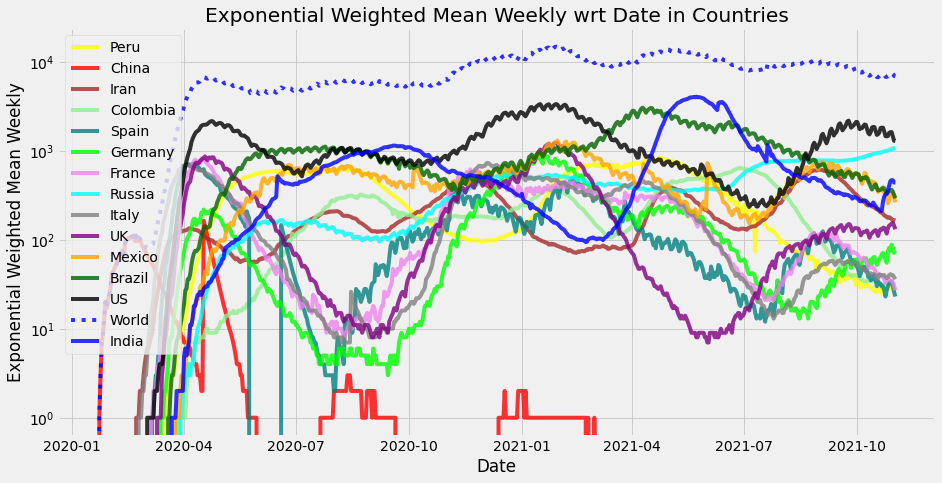

In [18]:
plotter(np.round(AVG), name)

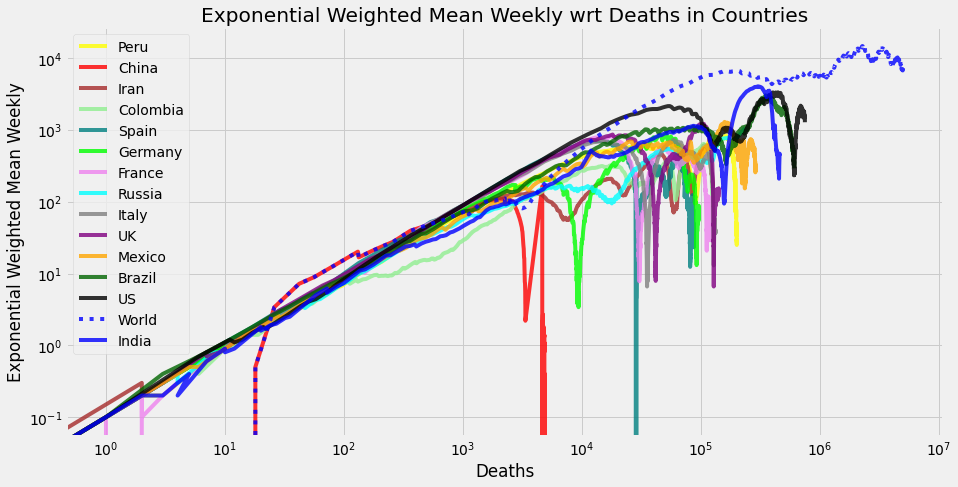

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

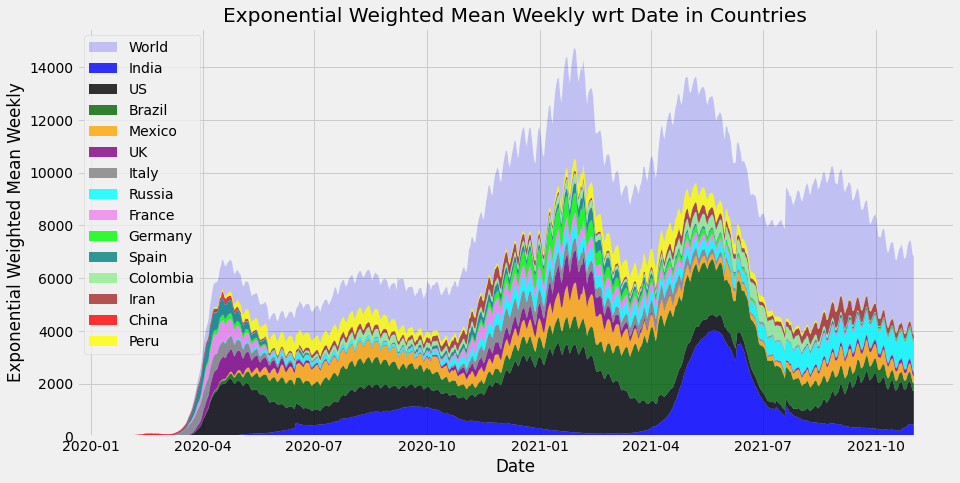

In [20]:
stackplotter(AVG, name)

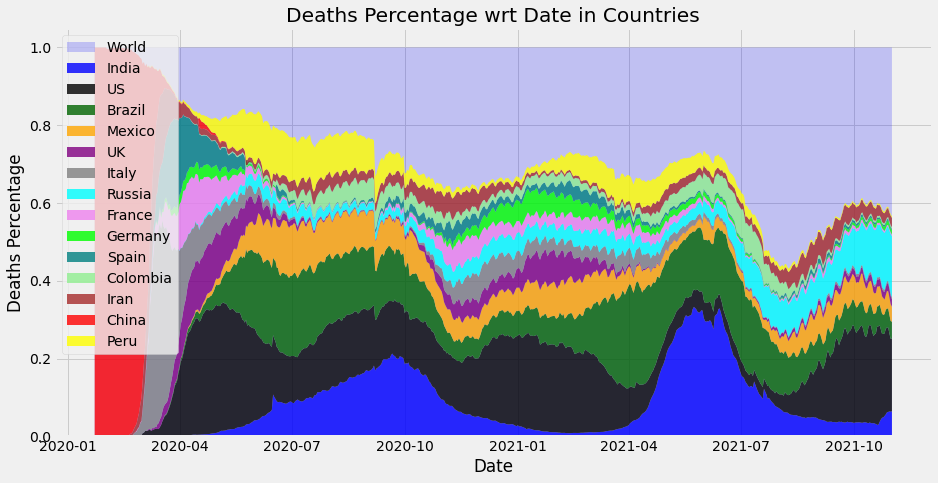

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

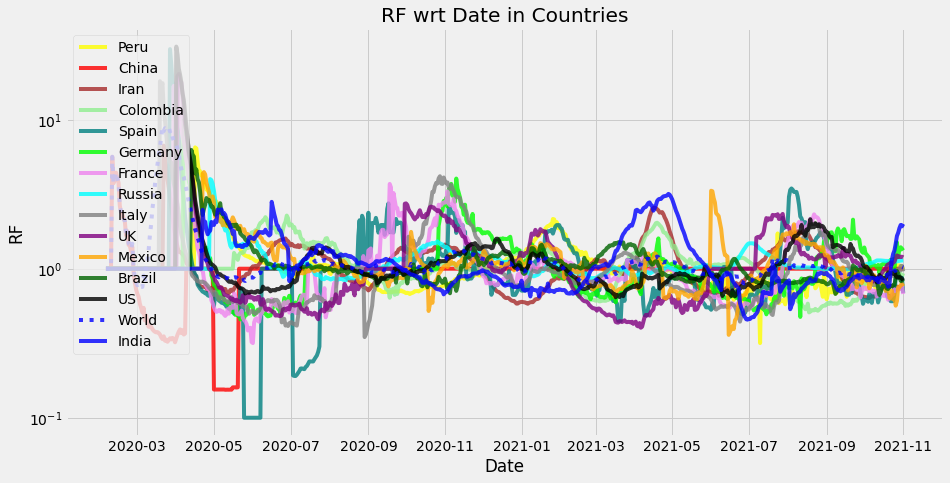

In [23]:
plotter(Reproductivity, 'RF')

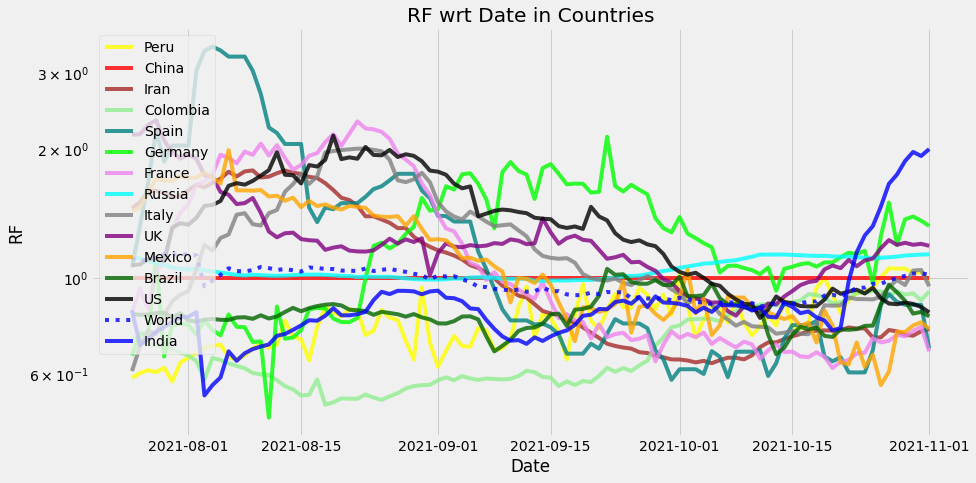

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

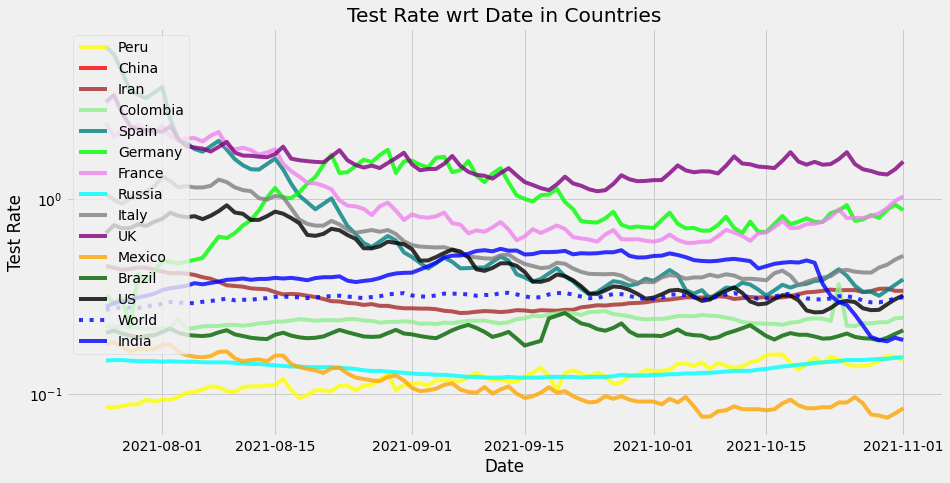

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

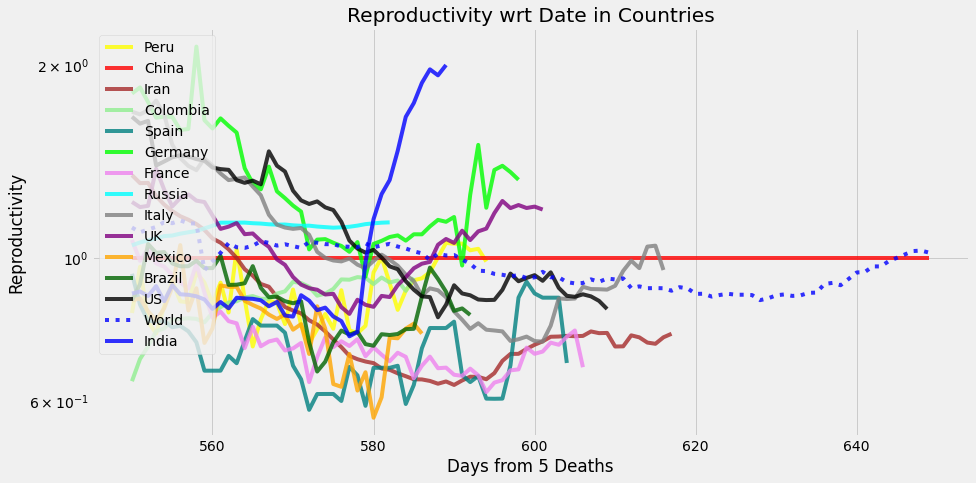

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

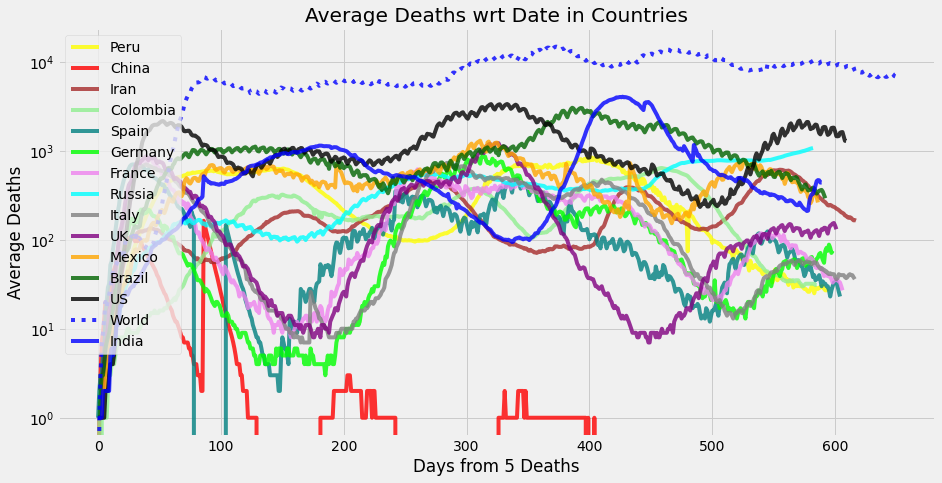

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

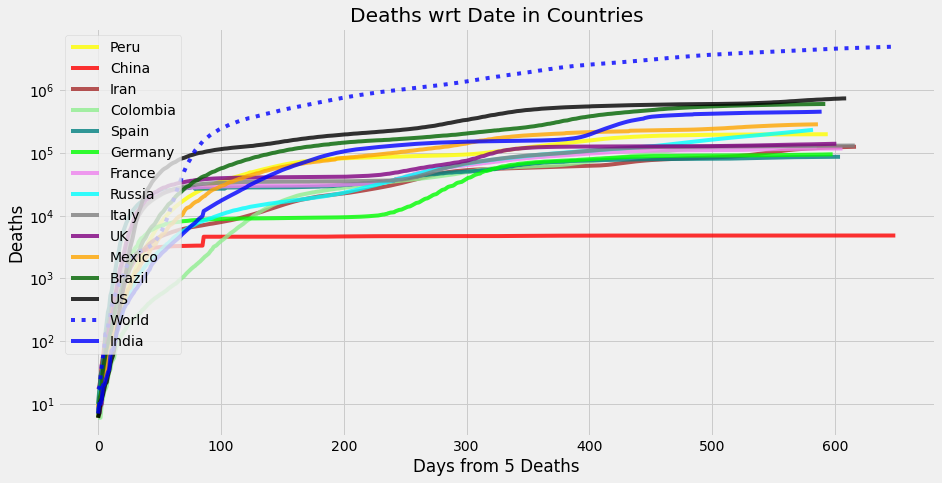

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5006081,6210,7214.57,6820.68,1.0205,247140208,0.314,428855,1001.22
US,747033,1201,1302.71,1279.77,0.8342,46091924,0.321,82177,149.41
Brazil,607922,98,302.57,291.74,0.8167,21814693,0.213,12448,121.58
India,458880,443,544.57,438.64,1.9979,34296237,0.190,16639,91.78
Mexico,288365,0,267.00,262.42,0.7639,3807211,0.085,4484,57.67
Russia,235318,1124,1116.00,1071.45,1.1375,8417305,0.155,33110,47.06
Peru,200276,30,27.57,27.70,0.9886,2202189,0.149,824,40.06
Indonesia,143423,18,26.86,32.28,0.5399,4244761,0.195,1258,28.68
UK,141098,43,158.29,131.22,1.1909,9140441,1.554,40777,28.22


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5006081,6210,7214.57,6820.68,1.0205,247140208,0.314,428855,1001.22
US,747033,1201,1302.71,1279.77,0.8342,46091924,0.321,82177,149.41
Russia,235318,1124,1116.00,1071.45,1.1375,8417305,0.155,33110,47.06
Ukraine,72402,329,576.71,484.11,1.8209,3073125,0.184,17768,14.48
India,458880,443,544.57,438.64,1.9979,34296237,0.190,16639,91.78
Romania,48073,322,441.86,399.91,1.3888,1655024,0.150,12002,9.61
Brazil,607922,98,302.57,291.74,0.8167,21814693,0.213,12448,121.58
Mexico,288365,0,267.00,262.42,0.7639,3807211,0.085,4484,57.67
Turkey,70828,217,212.00,211.98,1.0145,8061636,0.644,27293,14.17


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5006081


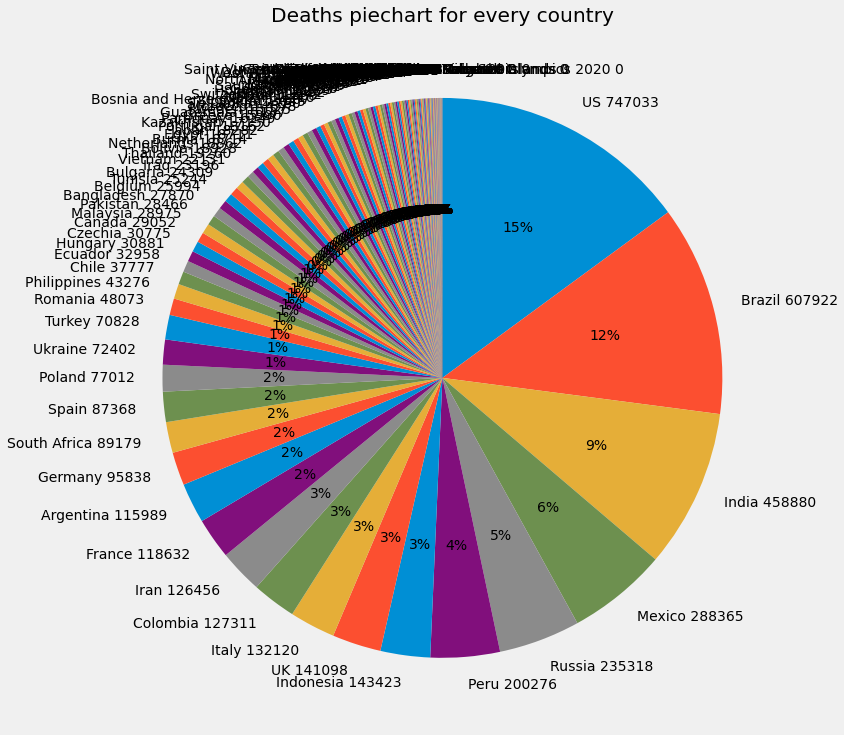

In [35]:
piechart('Deaths')

World total:  7214


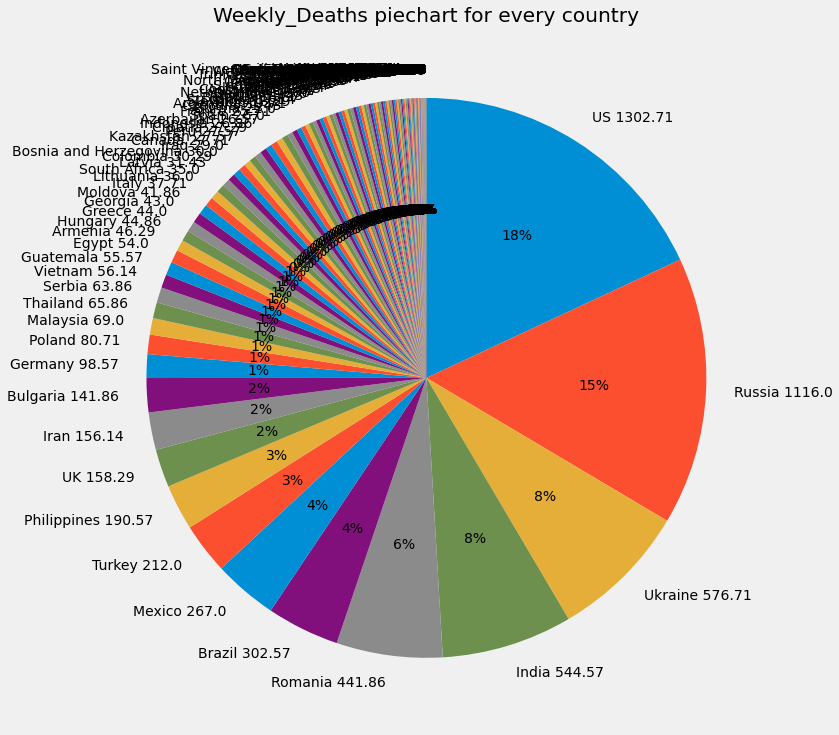

In [36]:
piechart('Weekly_Deaths')

World total:  6210


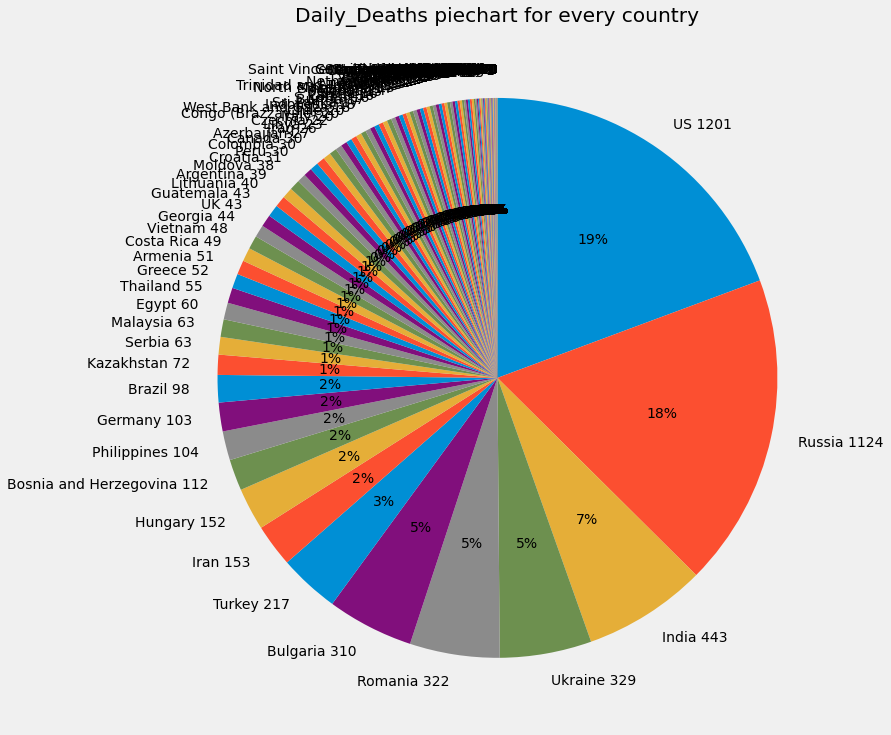

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-02


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1001216200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


[master 0b6b6d0] `date` update
 2 files changed, 35776 insertions(+), 22276 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   46d4427..0b6b6d0  master -> master
